# Capturing bridging ties and bridging position

Learning goals:
        
1. Familiarizing yourself with network bridging measures
2. Computing network briding measures in Python/NetworkX
3. Communicating network bridging measures        

## Loading modules

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import networkx as nx

## Generate different networks

In [31]:
# a star
s = nx.Graph()
s.add_nodes_from([1,2,3,4,5])
s.add_edges_from([(1,2),(1,3),(1,4),(1,5)])
# a bow-tie
b =nx.Graph()
b.add_nodes_from([1,2,3,4,5])
b.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,3),(4,5)])
# a complete network
c = nx.Graph()
c.add_nodes_from([1,2,3,4,5])
c.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5), (2, 4)])
# two cliques connected by a bridge
l = nx.Graph()
l.add_nodes_from([1,2,3,4,5,6,7])
l.add_edges_from([(2,3), (2, 4), (3, 4), (1, 2), (1, 5), (5, 6), (5, 7), (6, 7)])


## Display the networks

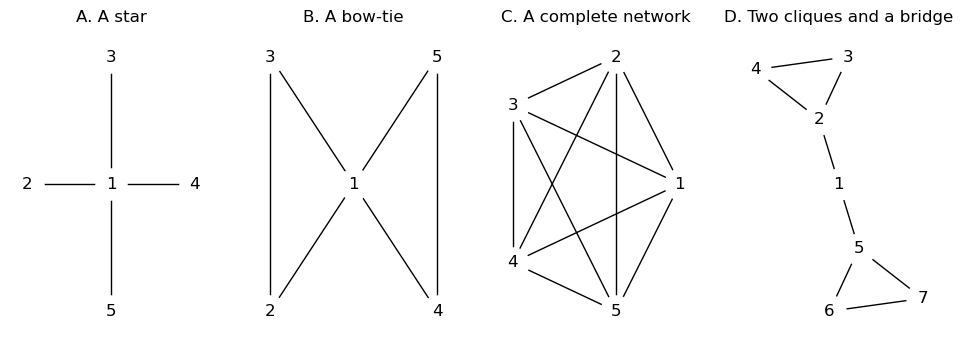

In [69]:
# the figure
fig = plt.figure(figsize=(12, 4))
# some plots
[ax0, ax1, ax2, ax3] = fig.subplots(1,4)
# plot titles
ax0.set_title('A. A star')
ax1.set_title('B. A bow-tie')
ax2.set_title('C. A complete network')
ax3.set_title('D. Two cliques and a bridge')
# the star
pos = {1:(0,0), 2:(-1,0), 3:(0,1), 4:(1,0), 5:(0,-1)}
nx.draw(s, pos, ax=ax0, with_labels=True, node_color='w', node_size=500)
# the bow-tie
pos = {1:(0,0), 2:(-1,-1), 3:(-1,1), 4:(1,-1), 5:(1,1)}
nx.draw(b, pos, ax=ax1, with_labels=True, node_color='w', node_size=500)
# the complete network
pos = nx.kamada_kawai_layout(c)
nx.draw(c, pos, ax=ax2, with_labels=True, node_color='w', node_size=500)
# two cliques connected by a bridge
pos = nx.kamada_kawai_layout(l)
nx.draw(l, pos, ax=ax3, with_labels=True, node_color='w', node_size=500)
# show the plot
plt.show()

## Measuring the extent to which an edge is a bridge

Notes. — Betweenness centrality of an edge, a measure of the extent to which an edge 
is a bridge, is the sum of the fraction of all-pairs shortest paths that pass through 
edge $e$

\begin{equation}
c_{B}(e) = \sum_{s,t \in V} \frac{\sigma(s, t|e)}{\sigma(st)}
\end{equation}

where $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest paths,
and $\sigma(s, t|e)$ is the number of shortest paths that pass through edge $e$.

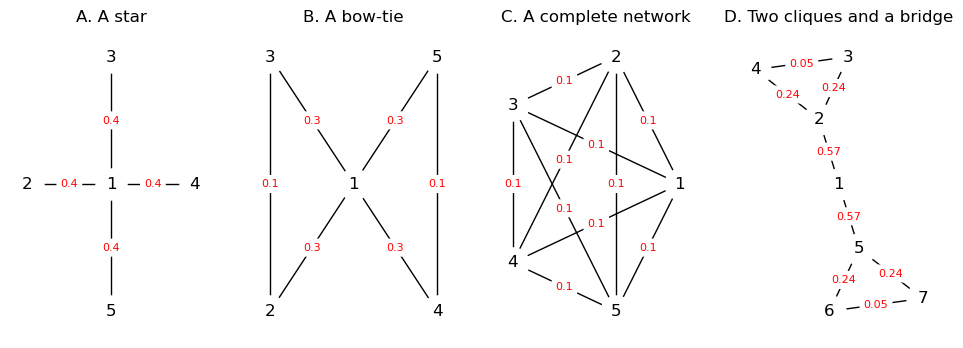

In [84]:
# the figure
fig = plt.figure(figsize=(12, 4))
# some plots
[ax0, ax1, ax2, ax3] = fig.subplots(1, 4)
# plot titles
ax0.set_title("A. A star")
ax1.set_title("B. A bow-tie")
ax2.set_title("C. A complete network")
ax3.set_title("D. Two cliques and a bridge")
# the star
pos = {1: (0, 0), 2: (-1, 0), 3: (0, 1), 4: (1, 0), 5: (0, -1)}
nx.draw(s, pos, ax=ax0, with_labels=True, node_color="w", node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(s).items()}
nx.draw_networkx_edge_labels(
    s, pos, edge_labels=edge_labels, ax=ax0, font_color="r", font_size=8, rotate=False
)
# the bow-tie
pos = {1: (0, 0), 2: (-1, -1), 3: (-1, 1), 4: (1, -1), 5: (1, 1)}
nx.draw(b, pos, ax=ax1, with_labels=True, node_color="w", node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(b).items()}
nx.draw_networkx_edge_labels(
    b, pos, edge_labels=edge_labels, ax=ax1, font_color="r", font_size=8, rotate=False
)
# the complete network
pos = nx.kamada_kawai_layout(c)
nx.draw(c, pos, ax=ax2, with_labels=True, node_color="w", node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(c).items()}
nx.draw_networkx_edge_labels(
    c, pos, edge_labels=edge_labels, ax=ax2, font_color="r", font_size=8, rotate=False
)
# two cliques connected by a bridge
pos = nx.kamada_kawai_layout(l)
nx.draw(l, pos, ax=ax3, with_labels=True, node_color="w", node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(l).items()}
nx.draw_networkx_edge_labels(
    l, pos, edge_labels=edge_labels, ax=ax3, font_color="r", font_size=8, rotate=False
)
# show the plot
plt.show()


## Test if a graph contains at least a bridge

Notes. — A bridge in a graph is an edge whose removal causes the number of 
connected components of the graph to increase.

In [93]:
for label, graph in zip(["A", "B", "C", "D"], [s, b, c, l]):
    print(
        "Does graph {} contain a bridge? {} \n {}".format(
            label, nx.has_bridges(graph), 35 * "_"
        )
    )


Does graph A contain a bridge? True 
 ___________________________________
Does graph B contain a bridge? False 
 ___________________________________
Does graph C contain a bridge? False 
 ___________________________________
Does graph D contain a bridge? True 
 ___________________________________


## Measuring the extent to which a node plays a briging role

There are two candidate measures to assess how a node plays a bridging role in 
a network:

- node betweenness centrality
- Burt's Constraint Index

Notes. — Node betweenness centrality of a node $v$ is the sum of the fraction 
of all-pairs shortest paths that pass through node $v$. The constraint is a 
measure of the extent to which a node $v$ is invested in those nodes that are 
themselves invested in the neighbors of $v$. Formally, the constraint on $v$, 
denoted $c(v)$, is defined by

\begin{equation}
c(v) = \sum_{w \in N(v)\\\{v\}} \ell(v, w)
\end{equation}

where $N(v)$ is the subset of the neighbors of $v$ that 
are either predecessors or successors of $v$ and $\ell(v,w)$ is the local constraint 
on $v$ with respect to $w$.

Formally, the local constraint on $u$ with respect to $v*$, denoted
$\ell(v)$, is defined by

\begin{equation}
\ell(u, v) = \left(p_{uv} + \sum_{w \in N(v)} p_{uw} p_{wv}\right)^2,
\end{equation}

where $N(v)$ is the set of neighbors of $v$ and $p_{uv}$ is the
normalized mutual weight of the (directed or undirected) edges
joining $u$ and $v$, for each vertex $u$ and $v$. The *mutual
weight* of $u$ and $v$ is the sum of the weights of edges joining
them (edge weights are assumed to be one if the graph is
unweighted).


### Plotting node betweeness centrality

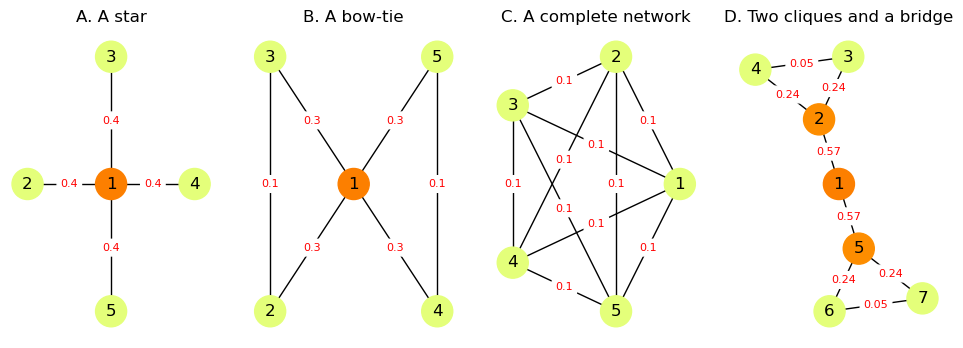

In [118]:
# the figure
fig = plt.figure(figsize=(12, 4))
cm = plt.cm.get_cmap('Wistia')
# some plots
[ax0, ax1, ax2, ax3] = fig.subplots(1, 4)
# plot titles
ax0.set_title("A. A star")
ax1.set_title("B. A bow-tie")
ax2.set_title("C. A complete network")
ax3.set_title("D. Two cliques and a bridge")
# the star
pos = {1: (0, 0), 2: (-1, 0), 3: (0, 1), 4: (1, 0), 5: (0, -1)}
color = [v for k, v in nx.betweenness_centrality(s).items()]
nx.draw(s, pos, ax=ax0, with_labels=True, node_color=color, cmap=cm, node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(s).items()}
nx.draw_networkx_edge_labels(
    s, pos, edge_labels=edge_labels, ax=ax0, font_color="r", font_size=8, rotate=False
)
# the bow-tie
pos = {1: (0, 0), 2: (-1, -1), 3: (-1, 1), 4: (1, -1), 5: (1, 1)}
color = [v for k, v in nx.betweenness_centrality(b).items()]
nx.draw(b, pos, ax=ax1, with_labels=True, node_color=color, cmap=cm, node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(b).items()}
nx.draw_networkx_edge_labels(
    b, pos, edge_labels=edge_labels, ax=ax1, font_color="r", font_size=8, rotate=False
)
# the complete network
pos = nx.kamada_kawai_layout(c)
color = [v for k, v in nx.betweenness_centrality(c).items()]
nx.draw(c, pos, ax=ax2, with_labels=True, node_color=color, cmap=cm, node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(c).items()}
nx.draw_networkx_edge_labels(
    c, pos, edge_labels=edge_labels, ax=ax2, font_color="r", font_size=8, rotate=False
)
# two cliques connected by a bridge
pos = nx.kamada_kawai_layout(l)
color = [v for k, v in nx.betweenness_centrality(l).items()]
nx.draw(l, pos, ax=ax3, with_labels=True, node_color=color, cmap=cm, node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(l).items()}
nx.draw_networkx_edge_labels(
    l, pos, edge_labels=edge_labels, ax=ax3, font_color="r", font_size=8, rotate=False
)
# show the plot
plt.show()


### Plotting Burt's Constraint Measure

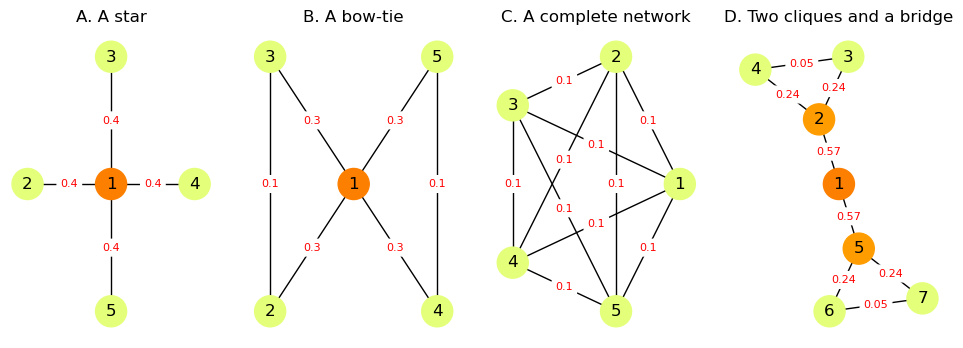

In [123]:
# the figure
fig = plt.figure(figsize=(12, 4))
cm = plt.cm.get_cmap('Wistia')
# some plots
[ax0, ax1, ax2, ax3] = fig.subplots(1, 4)
# plot titles
ax0.set_title("A. A star")
ax1.set_title("B. A bow-tie")
ax2.set_title("C. A complete network")
ax3.set_title("D. Two cliques and a bridge")
# the star
pos = {1: (0, 0), 2: (-1, 0), 3: (0, 1), 4: (1, 0), 5: (0, -1)}
color = [-1 * v for k, v in nx.constraint(s).items()]
nx.draw(s, pos, ax=ax0, with_labels=True, node_color=color, cmap=cm, node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(s).items()}
nx.draw_networkx_edge_labels(
    s, pos, edge_labels=edge_labels, ax=ax0, font_color="r", font_size=8, rotate=False
)
# the bow-tie
pos = {1: (0, 0), 2: (-1, -1), 3: (-1, 1), 4: (1, -1), 5: (1, 1)}
color = [-1 * v for k, v in nx.constraint(b).items()]
nx.draw(b, pos, ax=ax1, with_labels=True, node_color=color, cmap=cm, node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(b).items()}
nx.draw_networkx_edge_labels(
    b, pos, edge_labels=edge_labels, ax=ax1, font_color="r", font_size=8, rotate=False
)
# the complete network
pos = nx.kamada_kawai_layout(c)
color = [-1 * v for k, v in nx.constraint(c).items()]
nx.draw(c, pos, ax=ax2, with_labels=True, node_color=color, cmap=cm, node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(c).items()}
nx.draw_networkx_edge_labels(
    c, pos, edge_labels=edge_labels, ax=ax2, font_color="r", font_size=8, rotate=False
)
# two cliques connected by a bridge
pos = nx.kamada_kawai_layout(l)
color = [-1 * v for k, v in nx.constraint(l).items()]
nx.draw(l, pos, ax=ax3, with_labels=True, node_color=color, cmap=cm, node_size=500)
edge_labels = {k: np.round(v, 2) for k, v in nx.edge_betweenness(l).items()}
nx.draw_networkx_edge_labels(
    l, pos, edge_labels=edge_labels, ax=ax3, font_color="r", font_size=8, rotate=False
)
# show the plot
plt.show()